In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML Dataset/online_shoppers_intention.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [24]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
print(X_train)

[[0 0.0 2 ... 13 'Returning_Visitor' False]
 [1 993.0 0 ... 2 'Returning_Visitor' False]
 [0 0.0 1 ... 10 'Returning_Visitor' False]
 ...
 [13 331.9833333 5 ... 10 'Returning_Visitor' True]
 [0 0.0 0 ... 10 'Returning_Visitor' False]
 [3 45.5 0 ... 3 'Returning_Visitor' False]]


In [19]:
print(y_train)

[ True False  True ...  True False False]


In [20]:
print(X_test)

[[0 0.0 0 ... 2 'Returning_Visitor' False]
 [16 180.6666667 1 ... 1 'Returning_Visitor' False]
 [9 186.6730769 0 ... 2 'Returning_Visitor' True]
 ...
 [0 0.0 0 ... 1 'Returning_Visitor' False]
 [2 178.3 2 ... 2 'Returning_Visitor' False]
 [0 0.0 0 ... 3 'Returning_Visitor' False]]


# Feature Scaling

In [25]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()
numerical_features = dataset.select_dtypes(exclude=['object']).columns.tolist()
numerical_features.remove('Revenue') # Remove 'Revenue' if present


# Create a ColumnTransformer to handle both numerical and categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # Apply OneHotEncoder to categorical features
    ])

# Split data into training and testing sets
X = dataset.drop(columns=['Revenue'])
y = dataset['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [26]:
print(X_train)

[[-0.70021386 -0.45000244  1.17686819 ...  0.          0.
   1.        ]
 [-0.39810124  4.98669978 -0.39178048 ...  0.          0.
   1.        ]
 [-0.70021386 -0.45000244  0.39254385 ...  0.          0.
   1.        ]
 ...
 [ 3.22725013  1.36761541  3.52984118 ...  0.          0.
   1.        ]
 [-0.70021386 -0.45000244 -0.39178048 ...  0.          0.
   1.        ]
 [ 0.20612398 -0.20088869 -0.39178048 ...  0.          0.
   1.        ]]


# Training the Random Forest Classification model on the Training set

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predicting the Test set results

In [31]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [ True False]
 [False False]]


# Making the Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2463   96]
 [ 250  274]]


0.8877716509892961

# Visualization

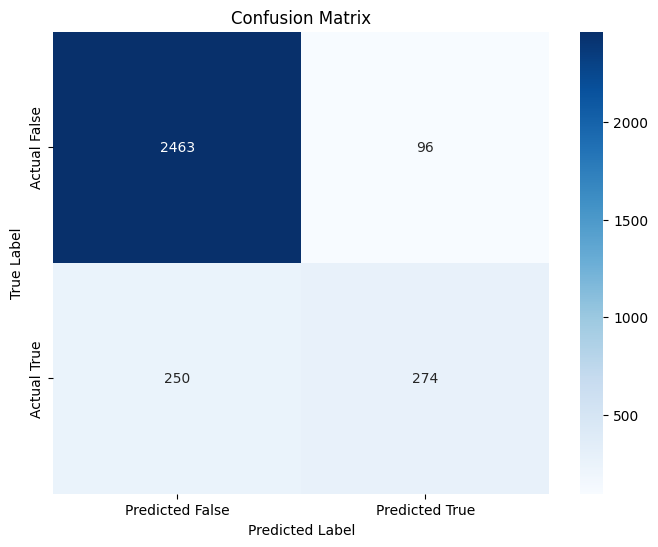

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are defined from your previous code

# Confusion Matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted False', 'Predicted True'],
            yticklabels=['Actual False', 'Actual True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()







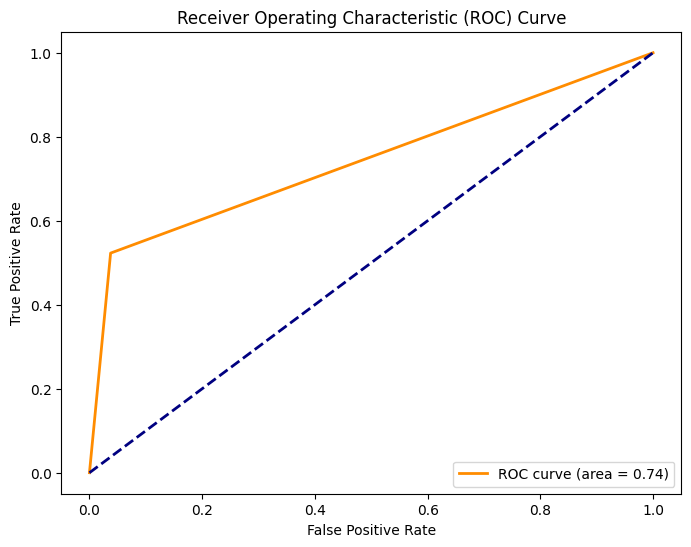

In [34]:
# ROC Curve visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()